# Getting truth Info

Small demo script that grab some simple truth info

In [1]:
rucio_name = "rucio://mc16_13TeV:mc16_13TeV.361022.Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ2W.deriv.DAOD_EXOT15.e3668_s3126_r9364_r9315_p4696?files=20"

Make sure to get the type library installed here with:

```bash
pip install func_adl_servicex_xaodr21
```

In [2]:
from func_adl_servicex_xaodr21 import SXDSAtlasxAODR21
from servicex import ServiceXDataset

sx_ds = ServiceXDataset(rucio_name, backend_name="xaod_r21", image="sslhep/servicex_func_adl_xaod_transformer:v1.1.4")
ds = SXDSAtlasxAODR21(sx_ds)
# ds = SXDSAtlasxAODR21(rucio_name)

Do the query here

In [3]:
# import logging
# logging.basicConfig()
# logging.getLogger("servicex").setLevel(level=logging.DEBUG)

all_particles = (ds
                 .SelectMany(lambda e: e.TruthParticles("TruthParticles"))
                 .Where(lambda tp: (tp.pt() / 1000) > 10)
                 .Select(lambda tp: {
                         'pt': tp.pt() / 1000.0,
                         'pdgId': abs(tp.pdgId()),
                 })
                 .Where(lambda tp: tp['pt'] >= 15)
                 .AsAwkwardArray()
                 .value())

rucio://mc16_13TeV:m...:   0%|          | 0/9000000000.0 [00:00]

        rucio://mc16_13TeV:m... Downloaded:   0%|          | 0/9000000000.0 [00:00]

And plot...

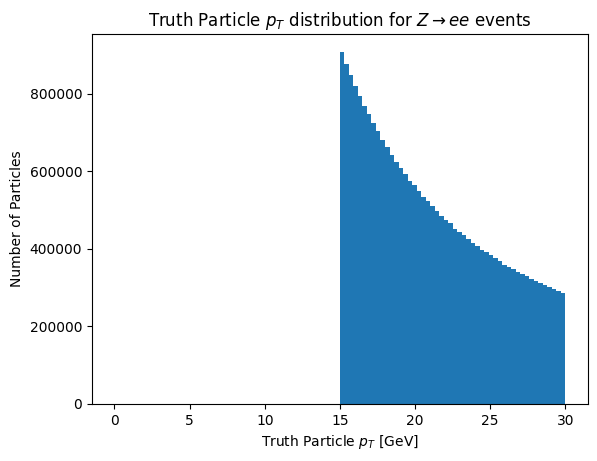

In [6]:
from matplotlib import pyplot as plt

plt.hist(all_particles.pt, bins=100, range=(0, 30))
plt.xlabel('Truth Particle $p_T$ [GeV]')
plt.ylabel('Number of Particles')
_ = plt.title(r'Truth Particle $p_T$ distribution for $Z\rightarrow ee$ events')